## The San Francisco Chronicle

In this project, I'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.


### 1.1. Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

In [739]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Web scraping tools
import lxml.html as lx
import requests
import requests_cache

requests_cache.install_cache("mycache")

In [527]:
def extract_links(url):
    ''' This function reads in a validate URL of the article list and
    returns a list of article URLs'''
    response = requests.get(url)
    try:
        response.raise_for_status()
    except:
        print("The url couldn't be downloaded!")
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    
    # Get all <h2> tags with class "headline"
    links1 = html.xpath("//h2[contains(@class, 'headline')]/a/@href")
    # Get all <div> tags with class "item rel-links"
    links2 = html.xpath("//div[contains(@class, 'item rel-links')]/h4/a/@href")
    # Get all <h3> tags with class "headline display-above"
    links3 = html.xpath("//h3[contains(@class, 'headline display-above')]/a/@href")
    # Get all <div> tags with class "carousel-thumb"
    links4 = html.xpath("//div[contains(@class, 'carousel-thumb')]/a/@href")
    links = links1 + links2 + links3 + links4
    # Drop the dupplicate links
    links = list(set(links))
    
    # Remove the links that does not contain the word "article"
    for u in links:
        if "article" not in u:
            links.remove(u)
    return links

In [540]:
# Test the function with the Biz+Tec category and show the first 10 links
extract_links("https://www.sfchronicle.com/business/")

['https://www.sfchronicle.com/realestate/article/15-years-and-a-luxe-remodel-add-2-755M-to-13608204.php',
 'https://www.sfchronicle.com/business/article/Ship-traffic-February-25-13637261.php',
 'https://www.sfchronicle.com/business/article/The-Hound-Gentlemen-s-Clothiers-finds-buyer-on-13635174.php',
 'https://www.sfchronicle.com/business/article/Trump-administration-begins-effort-to-strip-work-13634442.php',
 'https://www.sfchronicle.com/realestate/article/What-s-a-piece-of-technology-you-can-t-13620503.php',
 'https://www.sfchronicle.com/news/world/article/Stocks-head-lower-threatening-to-break-a-winning-13633615.php',
 'https://www.sfchronicle.com/business/article/Tesla-s-top-lawyer-departs-other-problems-13638377.php',
 'https://www.sfchronicle.com/business/networth/article/Answers-to-readers-tax-questions-on-college-13621175.php',
 'https://www.sfchronicle.com/business/article/Bay-Area-blood-test-firm-enters-quasi-bankruptcy-13637887.php',
 'https://www.sfchronicle.com/business/ar

In [531]:
# Test the function with the Politics category and show the first 10 links
extract_links("https://www.sfchronicle.com/elections/")[:10]

['https://www.sfchronicle.com/news/crime/article/AP-source-Mueller-report-not-expected-next-week-13637596.php',
 'https://www.sfchronicle.com/nation/article/Trump-tweets-lace-into-Pelosi-as-shutdown-enters-13548206.php',
 'https://www.sfchronicle.com/bayarea/article/SF-Mayor-Breed-defends-effort-to-free-brother-13479242.php',
 'https://www.sfchronicle.com/politics/article/Will-Gov-elect-Gavin-Newsom-move-to-Sacramento-13373006.php',
 'https://www.sfchronicle.com/politics/article/Sexual-misconduct-allegations-force-CA-Dem-chair-13432144.php',
 'https://www.sfchronicle.com/news/texas/article/House-Dems-introduce-measure-to-revoke-Trump-13636483.php',
 'https://www.sfchronicle.com/bayarea/philmatier/article/Oakland-Raiders-Coliseum-close-to-deal-to-keep-13628183.php',
 'https://www.sfchronicle.com/bayarea/philmatier/article/Oakland-Mayor-Libby-Schaaf-pulls-in-bucks-for-13545663.php',
 'https://www.sfchronicle.com/news/article/Trump-picks-Craft-as-nominee-for-UN-post-13638048.php',
 'https

In [532]:
# Test the function with the Sports category and show the first 10 links
extract_links("https://www.sfchronicle.com/sports/")[:10]

['https://www.sfchronicle.com/collegesports/article/Stanford-women-hold-off-upset-minded-Arizona-56-54-13638726.php',
 'https://www.sfchronicle.com/49ers/article/Kiper-49ers-probably-won-t-want-to-miss-out-on-13631354.php',
 'https://www.sfchronicle.com/athletics/article/Enough-time-for-Jesus-Luzardo-to-make-A-s-13638558.php',
 'https://www.sfchronicle.com/collegesports/article/Stanford-s-Tara-VanDerveer-says-Alanna-Smith-13634736.php',
 'https://www.sfchronicle.com/warriors/article/There-s-more-to-Warriors-Damian-Jones-than-13494668.php',
 'https://www.sfchronicle.com/collegesports/article/College-football-mismatches-Why-do-they-play-13221029.php',
 'https://www.sfchronicle.com/sports/article/Mission-boys-Lowell-girls-win-San-Francisco-13638862.php',
 'https://www.sfchronicle.com/travel/article/Tracing-Bay-Area-rivers-from-skyline-to-sea-13632393.php',
 'https://www.sfchronicle.com/warriors/article/How-is-Don-Nelson-spending-retirement-Smoking-13635821.php',
 'https://www.sfchronicle.

### 1.2. Write a function that extracts data from a Chronicle article. The function should:

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) the function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```

In [603]:
# Reference: Piazza post @400
def read_url(url):
    '''This function downlowads the page and parses the HTML'''
    
    response = requests.get(url)
    try:
        response.raise_for_status()
    except:
        print("The url couldn't be downloaded!")
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    return html

# Looking through the articles, I found that there are generally two article formats;
# one is the typical format that clearly shows the features of the article,
# and the other one is the relatively "good-looking" format.
# So, my functions that extract each of the features have to consider these two formats

def get_title(url):
    '''This functions extract the title from a Chronicle article '''
   
    html = read_url(url)
    # Get the <h1> tag with class "header-title"
    title = html.xpath("//h1[contains(@class, 'header-title')]/text()")
    if len(title):
        return title[0]
    # Get the <h1> tag with class "headline entry-title"
    title = html.xpath("//h1[contains(@class, 'headline entry-title')]/text()")
    if len(title):
        return title[0]

def get_author(url):
    '''This functions extract the author from a Chronicle article '''
    
    html = read_url(url)
    # Get the <span> tag with class "header-authors-name"
    author = html.xpath("//span[@class = 'header-authors-name']")
    if len(author):
        return author[0].text_content()
    # Get the <p> tag with class "byline"
    author = html.xpath('//p[@class="byline"]')
    if len(author):
        return author[0].text_content()

def get_text(url):
    '''This functions extract the text from a Chronicle article '''
    
    html = read_url(url)
    # Get the <section> tags with class "body"
    text = html.xpath("//section[contains(@class, 'body')]/p/text()")
    if len(text):
        text = " ".join(text)
        return text
    # Get the <div> tags with class "article-body"
    text = html.xpath("//div[contains(@class, 'article-body')]/p/text()")
    if len(text):
        text = "".join(text)
        return text
    
def get_date(url):
    '''This functions extract the date from a Chronicle article '''
    
    html = read_url(url)
    try:
        date = html.cssselect("time")[0]
        date = date.attrib.get("datetime")
    except IndexError:
        date = html.cssselect("meta")[5]
        date = date.attrib.get("content")
    return date

def get_update(url):
    '''This functions extract the modified date from a Chronicle article '''
    
    html = read_url(url)
    try:
        update = html.cssselect("time")[1]
        update = update.attrib.get("datetime")
    except IndexError:
        update = html.cssselect("meta")[6]
        update = update.attrib.get("content")
    return update

def extract_data(url):
    '''Extracts data from a Chronicle article and returns a dictionary'''
    url = url
    title = get_title(url)
    text = get_text(url)
    author = get_author(url)
    date = get_date(url)
    date_updated = get_update(url)
    return {"url": url, "title": title, "text": text, "author": author, "date": date, "date_updated": date_updated}


### 1.3. Get data frames of articles for the "Biz+Tech", "Lifestyle," and "US & World" categories 

I added a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will the corpus for natural language processing in the next section.

In [541]:
# Create a data frame for the Biz+Tec articles
links_biz = extract_links("https://www.sfchronicle.com/business/")
articles_biz = [extract_data(u) for u in links_biz]
df_biz = pd.DataFrame(articles_biz)

# Add a column to indicate the category
df_biz["category"] = "Biz+Tech"

,author,date,date_updated,text,title,url,category
0,Anna Marie Erwert,2019-02-21T12:03:33+00:00,2019-02-21T13:18:46+00:00,"In 2001, this Russian Hill home sold for $740,...",15 years and a luxe remodel add $2.755M to Rus...,https://www.sfchronicle.com/realestate/article...,Biz+Tech
1,None,2019-02-22T18:46:23+00:00,SFChronicle,Due to arrive today Due to depart today,"Ship traffic, February 25",https://www.sfchronicle.com/business/article/S...,Biz+Tech
2,Shwanika Narayan,2019-02-22T12:00:00+00:00,2019-02-22T12:00:34+00:00,One of San Francisco’s last traditional men’s ...,The Hound Gentlemen’s Clothiers finds buyer on...,https://www.sfchronicle.com/business/article/T...,Biz+Tech
3,Tal Kopan,2019-02-22T02:04:26+00:00,2019-02-22T02:05:15+00:00,"WASHINGTON — After nearly of delays, the Tru...",Trump administration begins effort to strip wo...,https://www.sfchronicle.com/business/article/T...,Biz+Tech
4,None,2019-02-20T18:16:16+00:00,2019-02-20T18:18:03+00:00,Real estate today moves at the speed of infor...,What’s a piece of technology you can’t imagine...,https://www.sfchronicle.com/realestate/article...,Biz+Tech
5,None,2019-02-22T02:11:41+00:00,2019-02-22T02:22:04+00:00,TOKYO (AP) — Asian shares were mostly lower Fr...,Asian shares mostly lower as investors watch t...,https://www.sfchronicle.com/news/world/article...,Biz+Tech
6,None,2019-02-23T01:40:46+00:00,2019-02-23T01:41:38+00:00,After lurching from crisis to crisis last year...,"Tesla’s top lawyer departs, other problems lin...",https://www.sfchronicle.com/business/article/T...,Biz+Tech
7,Kathleen Pender,2019-02-16T12:00:00+00:00,2019-02-17T05:47:29+00:00,Readers had several questions about my recent ...,Answers to readers’ tax questions on college s...,https://www.sfchronicle.com/business/networth/...,Biz+Tech
8,Sophia Kunthara,2019-02-22T23:15:11+00:00,2019-02-22T23:15:54+00:00,"CardioDx, the defunct Redwood City company tha...",Bay Area blood test firm enters quasi-bankrupt...,https://www.sfchronicle.com/business/article/B...,Biz+Tech
9,Carolyn Said,2018-02-16T14:00:00+00:00,2018-02-18T00:18:33+00:00,"If anyone knew the ropes about Airbnb rentals,...","Long, winding road to SF’s get-tough registrat...",https://www.sfchronicle.com/business/article/L...,Biz+Tech


In [724]:
# Create a data frame for the Lifestyle articles
links_lifestyle = extract_links("https://www.sfchronicle.com/lifestyle/")
articles_lifestyle = [extract_data(u) for u in links_lifestyle]
df_lifestyle = pd.DataFrame(articles_lifestyle)

# Add a column to indicate the category
df_lifestyle["category"] = "Lifestyle"

In [546]:
# Create a data frame for the US & World articles
links_us_world = extract_links("https://www.sfchronicle.com/us-world/")
articles_us_world = [extract_data(u) for u in links_us_world]
df_us_world = pd.DataFrame(articles_us_world)

# Add a column to indicate the category
df_us_world["category"] = "US & World"

,author,date,date_updated,text,title,url,category
0,None,2019-02-24T03:22:45+00:00,2019-02-24T03:27:53+00:00,"CUCUTA, Colombia (AP) — A U.S.-backed campaign...",Venezuelan aid convoys meet fierce resistance;...,https://www.sfchronicle.com/news/world/article...,US & World
1,None,2019-02-20T21:17:00+00:00,SFChronicle,"EILAT, Israel — As the outlook for coral reefs...",Northern Red Sea coral reefs may survive a hot...,https://www.sfchronicle.com/world/article/Nort...,US & World
2,None,2019-02-24T03:39:38+00:00,2019-02-24T03:42:21+00:00,HOUSTON (AP) — The Latest on the crash of a ca...,The Latest: Sheriff says police have found par...,https://www.sfchronicle.com/news/texas/article...,US & World
3,None,2019-02-24T03:50:22+00:00,2019-02-24T04:21:35+00:00,"BLOUNTVILLE, Tenn. (AP) — Authorities say a ma...","Sheriff's deputy shot, man dead in Tennessee d...",https://www.sfchronicle.com/news/crime/article...,US & World
4,Kimberly Veklerov,2019-02-23T06:10:02+00:00,2019-02-23T06:11:12+00:00,A bill introduced Friday would give the Oaklan...,"Oakland A’s ballpark plan gets boost, but what...",https://www.sfchronicle.com/bayarea/article/Oa...,US & World
5,Jason Fagone,2019-02-21T12:00:00+00:00,2019-02-21T17:30:07+00:00,The state health department has finished crawl...,Limited scope of testing at SF shipyard housin...,https://www.sfchronicle.com/green/article/Limi...,US & World
6,None,2019-02-23T14:00:00+00:00,SFChronicle,"RICHMOND, Va. (AP) — In an uh-oh episode of hi...",Revolutionary War fighting ended but shots rec...,https://www.sfchronicle.com/news/article/Revol...,US & World
7,None,2019-02-24T04:09:53+00:00,2019-02-24T04:12:27+00:00,"CUCUTA, Colombia (AP) — The Latest on the poli...",The Latest: Pompeo urges Venezuelan troops to ...,https://www.sfchronicle.com/news/world/article...,US & World
8,None,2019-02-24T04:08:44+00:00,2019-02-24T04:11:03+00:00,"DANDONG, China (AP) — North Korea leader Kim J...",North Korea leader Kim Jong Un boards train to...,https://www.sfchronicle.com/news/world/article...,US & World
9,None,2019-02-23T08:05:12+00:00,2019-02-23T08:07:17+00:00,"ALLENTOWN, Pa. (AP) — Two decades later, it's ...","20 years ago, a thunderous explosion shook the...",https://www.sfchronicle.com/news/crime/article...,US & World


In [719]:
# Merge the three data frames
merged_df = pd.concat([df_biz, df_lifestyle, df_us_world])
merged_df

,author,date,date_updated,text,title,url,category
0,Anna Marie Erwert,2019-02-21T12:03:33+00:00,2019-02-21T13:18:46+00:00,"In 2001, this Russian Hill home sold for $740,...",15 years and a luxe remodel add $2.755M to Rus...,https://www.sfchronicle.com/realestate/article...,Biz+Tech
1,None,2019-02-22T18:46:23+00:00,SFChronicle,Due to arrive today Due to depart today,"Ship traffic, February 25",https://www.sfchronicle.com/business/article/S...,Biz+Tech
2,Shwanika Narayan,2019-02-22T12:00:00+00:00,2019-02-22T12:00:34+00:00,One of San Francisco’s last traditional men’s ...,The Hound Gentlemen’s Clothiers finds buyer on...,https://www.sfchronicle.com/business/article/T...,Biz+Tech
3,Tal Kopan,2019-02-22T02:04:26+00:00,2019-02-22T02:05:15+00:00,"WASHINGTON — After nearly of delays, the Tru...",Trump administration begins effort to strip wo...,https://www.sfchronicle.com/business/article/T...,Biz+Tech
4,None,2019-02-20T18:16:16+00:00,2019-02-20T18:18:03+00:00,Real estate today moves at the speed of infor...,What’s a piece of technology you can’t imagine...,https://www.sfchronicle.com/realestate/article...,Biz+Tech
5,None,2019-02-22T02:11:41+00:00,2019-02-22T02:22:04+00:00,TOKYO (AP) — Asian shares were mostly lower Fr...,Asian shares mostly lower as investors watch t...,https://www.sfchronicle.com/news/world/article...,Biz+Tech
6,None,2019-02-23T01:40:46+00:00,2019-02-23T01:41:38+00:00,After lurching from crisis to crisis last year...,"Tesla’s top lawyer departs, other problems lin...",https://www.sfchronicle.com/business/article/T...,Biz+Tech
7,Kathleen Pender,2019-02-16T12:00:00+00:00,2019-02-17T05:47:29+00:00,Readers had several questions about my recent ...,Answers to readers’ tax questions on college s...,https://www.sfchronicle.com/business/networth/...,Biz+Tech
8,Sophia Kunthara,2019-02-22T23:15:11+00:00,2019-02-22T23:15:54+00:00,"CardioDx, the defunct Redwood City company tha...",Bay Area blood test firm enters quasi-bankrupt...,https://www.sfchronicle.com/business/article/B...,Biz+Tech
9,Carolyn Said,2018-02-16T14:00:00+00:00,2018-02-18T00:18:33+00:00,"If anyone knew the ropes about Airbnb rentals,...","Long, winding road to SF’s get-tough registrat...",https://www.sfchronicle.com/business/article/L...,Biz+Tech


### 1.4. What topics has the Chronicle covered recently? How does the category affect the topics? 

In [633]:
import nltk
import nltk.corpus
from nltk.corpus import wordnet

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [ ]:
# For Biz+Tec

# Combine the text column
text_biz = df_biz.text.str.cat(sep = ' ')
# Convert all the words to lower case
text_biz = text_biz.lower()

In [692]:
# Split the words by whitespace
split_biz = nltk.word_tokenize(text_biz)

# Get approximate part of speech information with nltk's pos_tag() function
biz_tags = nltk.pos_tag(split_biz)

# Lemmatization looks up each token in a dictionary to find a root word, or lemma.
lemmatizer = nltk.WordNetLemmatizer()
split_biz = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in biz_tags]

In [705]:
# Stopwords are words that appear frequently but don't add meaning.
stopwords = nltk.corpus.stopwords.words("english")
# Customized stopwords
stopwords_biz = stopwords + ["say", "said", "also", "pg", "e", "go", "one", "could", "would", "take", "two", "last"]
split_biz =  [w for w in split_biz if w not in stopwords_biz]

In [725]:
# For Lifestyle

# Combine the text column
text_lifestyle = df_lifestyle.text.str.cat(sep = ' ')
# Convert all the words to lower case
text_lifestyle = text_lifestyle.lower()

# Split the words by whitespace
split_lifestyle = nltk.word_tokenize(text_lifestyle)

# Get approximate part of speech information with nltk's pos_tag() function
lifestyle_tags = nltk.pos_tag(split_lifestyle)

# Lemmatization looks up each token in a dictionary to find a root word, or lemma.
split_lifestyle = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in lifestyle_tags]

# Customized stopwords
stopwords_lifestyle = stopwords + ["like", "get", "want", "also", "say", "one", "go", "two", "take", 
                                   "first", "look", "around"]
split_lifestyle =  [w for w in split_lifestyle if w not in stopwords_lifestyle]

In [726]:
# For US & World

# Combine the text column
text_US = df_us_world.text.str.cat(sep = ' ')
# Convert all the words to lower case
text_US = text_US.lower()

# Split the words by whitespace
split_US = nltk.word_tokenize(text_US)

# Get approximate part of speech information with nltk's pos_tag() function
US_tags = nltk.pos_tag(split_US)

# Lemmatization looks up each token in a dictionary to find a root word, or lemma.
split_US = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in US_tags]

# Customized stopwords
stopwords_US = stopwords + ["say", "one", "could", "would", "first", "go", "take", "also", "come", "two"]
split_US =  [w for w in split_US if w not in stopwords_US]

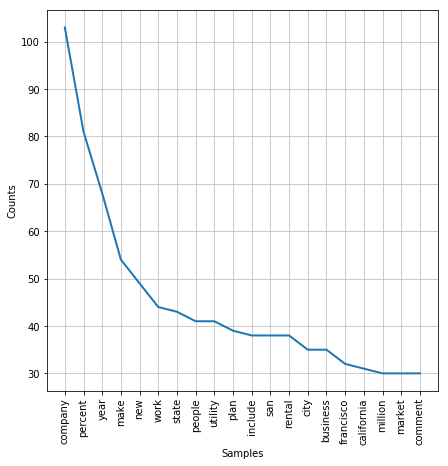

Text(0.5, 17.200000000000003, 'Words')

In [748]:
# Frequency distribution 
fq_biz = nltk.FreqDist(w for w in split_biz if w.isalnum())

# Create the Figure and plot.
fig1 = plt.figure(figsize = (7, 7))
# Show the 20 most common words 
fq_biz.plot(20, cumulative = False)

# Get the Axes object from the Figure.
ax = fig.get_axes()[0]

# Customize as with any other matplotlib Axes
ax.set_title("Biz+Tec Word Frequencies")
ax.set_xlabel("Words")

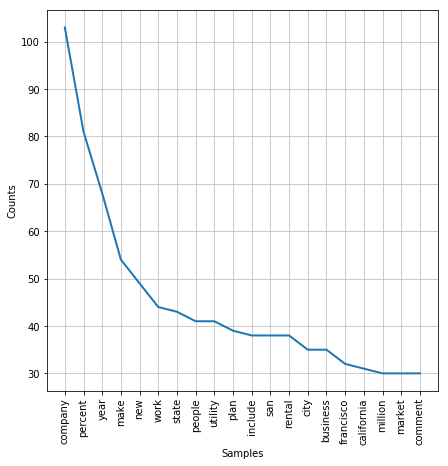

In [749]:
# Biz+Tec word frequencies
fig1

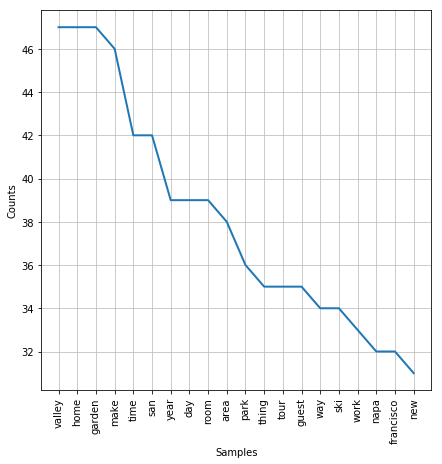

Text(0.5, 17.200000000000003, 'Words')

In [743]:
# Frequency distribution 
fq_lifestyle = nltk.FreqDist(w for w in split_lifestyle if w.isalnum())

# Create the Figure and plot.
fig2 = plt.figure(figsize = (7, 7))
# Show the 20 most common words 
fq_lifestyle.plot(20, cumulative = False)

# Get the Axes object from the Figure.
ax = fig2.get_axes()[0]

# Customize as with any other matplotlib Axes
ax.set_title("Lifestyle Word Frequencies")
ax.set_xlabel("Words")

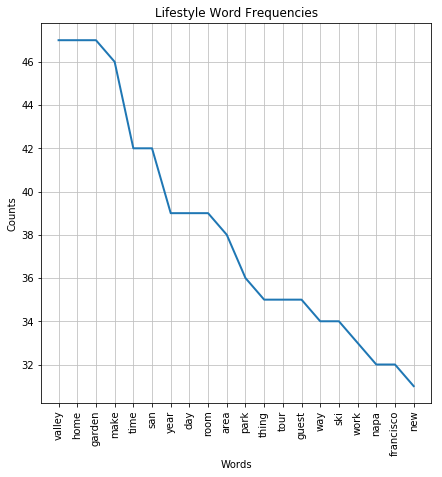

In [750]:
# Lifestyle word frequencies
fig2

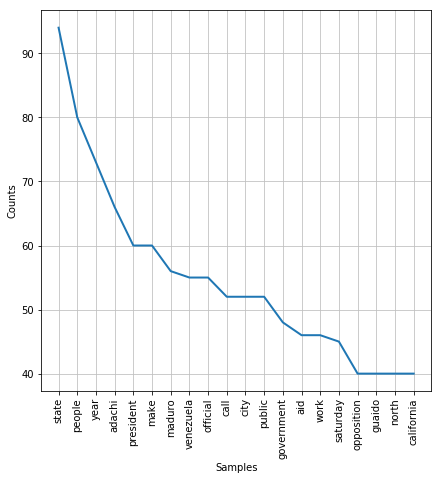

Text(0.5, 17.200000000000003, 'Words')

In [745]:
# Frequency distribution 
fq_US = nltk.FreqDist(w for w in split_US if w.isalnum())

# Create the Figure and plot.
fig3 = plt.figure(figsize = (7, 7))
# Show the 20 most common words 
fq_US.plot(20, cumulative = False)

# Get the Axes object from the Figure.
ax = fig3.get_axes()[0]

# Customize as with any other matplotlib Axes
ax.set_title("US & World Word Frequencies")
ax.set_xlabel("Words")

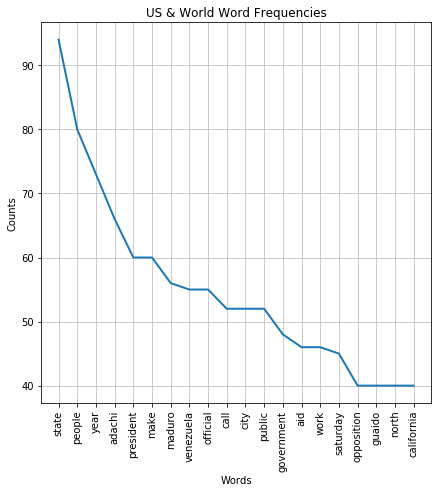

In [746]:
# US & World word frequencies
fig3

### Conclusion
Based on the frequencies distribution of the most common words in the SF Chronicle articles for different categories, I notice that the words that appear the most are varied between the catogoires. In the Business and Technology category, the words "company" appears the most which makes sense because companies are a large component of business. Besides, the words "rental" and "business" are also appeared frequently in the articles of this categoty. Another categoty that I explore is Lifestyle. The terms "home", "garden", "park", and "room" are the most common appeared in the articles, which are highly related to daly life. The last category is US & world, and it is a macro topic. The most common words within the articles are "state", "people", "city", "public", "government", "official", and etc. These common words indicate that this cateogry has a large component of politics and government. Moreover, names of presidents or government officers are also frequently appeared in the articles. There are also commom words that appear in all of these categories; for instance, the terms "year", "make", and "work" are in all categories.  